In [5]:
import yfinance as yf

In [6]:
stock = 'AAPL'

In [7]:
df = yf.download(tickers=stock, period='5y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-30,40.972500,42.017502,40.930000,41.680000,39.557049,178803200
2017-10-31,41.974998,42.412498,41.735001,42.259998,40.107506,144187200
2017-11-01,42.467499,42.485001,41.402500,41.722500,39.597374,134551200
2017-11-02,41.650002,42.125000,41.320000,42.027500,39.886841,165573600
2017-11-03,43.500000,43.564999,42.779999,43.125000,40.928448,237594400


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900
2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300
2022-10-26,150.960007,151.990005,148.039993,149.350006,149.350006,88194300
2022-10-27,148.070007,149.050003,144.130005,144.800003,144.800003,109180200
2022-10-28,148.199997,157.500000,147.820007,155.740005,155.740005,164659100


In [10]:
df1=df.reset_index()['Close']

In [11]:
df1


0        41.680000
1        42.259998
2        41.722500
3        42.027500
4        43.125000
           ...    
1254    149.449997
1255    152.339996
1256    149.350006
1257    144.800003
1258    155.740005
Name: Close, Length: 1259, dtype: float64

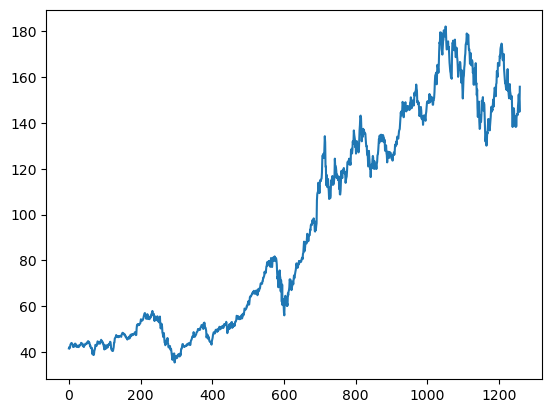

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
import numpy as np

In [14]:
df1


0        41.680000
1        42.259998
2        41.722500
3        42.027500
4        43.125000
           ...    
1254    149.449997
1255    152.339996
1256    149.350006
1257    144.800003
1258    155.740005
Name: Close, Length: 1259, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)


[[0.04187079]
 [0.04583083]
 [0.04216096]
 ...
 [0.77700784]
 [0.74594184]
 [0.82063675]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size


(818, 441)

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 300
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(517, 300)
(517,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(140, 300)
(140,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(300,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
9/9 [==============================] - 10s 1s/step - loss: 0.0381 - val_loss: 0.0104
Epoch 2/100
9/9 [==============================] - 7s 791ms/step - loss: 0.0096 - val_loss: 0.0200
Epoch 3/100
9/9 [==============================] - 7s 733ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 4/100
9/9 [==============================] - 6s 689ms/step - loss: 0.0024 - val_loss: 0.0063
Epoch 5/100
9/9 [==============================] - 6s 716ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 6/100
9/9 [==============================] - 7s 741ms/step - loss: 0.0015 - val_loss: 0.0072
Epoch 7/100
9/9 [==============================] - 7s 789ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 8/100
9/9 [==============================] - 7s 782ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 9/100
9/9 [==============================] - 6s 618ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 10/100
9/9 [==============================] - 4s 467ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 11/10

9/9 [==============================] - 3s 350ms/step - loss: 9.0612e-04 - val_loss: 0.0016
Epoch 82/100
9/9 [==============================] - 3s 338ms/step - loss: 5.9927e-04 - val_loss: 0.0014
Epoch 83/100
9/9 [==============================] - 3s 341ms/step - loss: 5.9912e-04 - val_loss: 0.0014
Epoch 84/100
9/9 [==============================] - 3s 346ms/step - loss: 6.0324e-04 - val_loss: 0.0016
Epoch 85/100
9/9 [==============================] - 3s 343ms/step - loss: 5.9521e-04 - val_loss: 0.0018
Epoch 86/100
9/9 [==============================] - 3s 338ms/step - loss: 6.3210e-04 - val_loss: 0.0019
Epoch 87/100
9/9 [==============================] - 3s 347ms/step - loss: 9.3295e-04 - val_loss: 0.0013
Epoch 88/100
9/9 [==============================] - 3s 335ms/step - loss: 6.8097e-04 - val_loss: 0.0015
Epoch 89/100
9/9 [==============================] - 3s 341ms/step - loss: 5.4013e-04 - val_loss: 0.0013
Epoch 90/100
9/9 [==============================] - 3s 351ms/step - loss: 6.0

In [29]:
import tensorflow as tf


In [30]:
### checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

81.73648653537397

In [33]:
math.sqrt(mean_squared_error(ytest,test_predict))

153.62064427890192

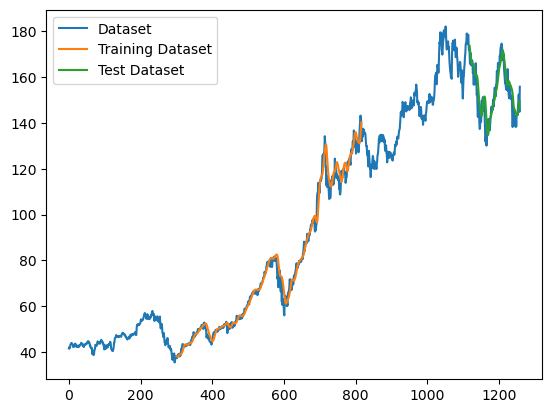

In [67]:
### Plotting 
# shift train predictions for plotting
look_back=300
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Dataset','Training Dataset', 'Test Dataset'])
plt.show()

In [35]:
len(test_data)


441

In [37]:
x_input=test_data[141:].reshape(1,-1)
x_input.shape

(1, 300)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
# prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=300
i=0
while(i<30):
    
    if(len(temp_input)>300):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.79206693]
301
1 day input [0.77885124 0.77024839 0.76464964 0.77188707 0.80274814 0.79394047
 0.79858325 0.80636681 0.81080486 0.82712303 0.81633527 0.80923453
 0.77441328 0.77837335 0.76860971 0.77482293 0.77318424 0.75454469
 0.73324234 0.73658784 0.75311093 0.75980204 0.7604165  0.74983357
 0.72620983 0.73249129 0.72341046 0.73126225 0.70729711 0.72074766
 0.7268243  0.73563197 0.73296917 0.73235471 0.72347869 0.71938215
 0.73884099 0.7462149  0.75789029 0.77297942 0.77639327 0.77789536
 0.77250154 0.77216013 0.77680301 0.77359399 0.798993   0.78008027
 0.77434504 0.78158237 0.79161908 0.78800042 0.79018522 0.78444999
 0.7869762  0.76724419 0.76690279 0.78137755 0.78144579 0.78827348
 0.80527445 0.83517965 0.8534779  0.85668693 0.85934972 0.86296839
 0.82794232 0.85136134 0.88590942 0.88229075 0.87539472 0.86228557
 0.886046   0.92605614 0.95268418 0.94913376 0.98252114 0.95719048
 0.94756342 0.98149703 0.93343006 0.92578308 0.9162926  0.93841434
 0.95650767 0.96087739 0.98852954

5 day output [[0.81086046]]
6 day input [0.79394047 0.79858325 0.80636681 0.81080486 0.82712303 0.81633527
 0.80923453 0.77441328 0.77837335 0.76860971 0.77482293 0.77318424
 0.75454469 0.73324234 0.73658784 0.75311093 0.75980204 0.7604165
 0.74983357 0.72620983 0.73249129 0.72341046 0.73126225 0.70729711
 0.72074766 0.7268243  0.73563197 0.73296917 0.73235471 0.72347869
 0.71938215 0.73884099 0.7462149  0.75789029 0.77297942 0.77639327
 0.77789536 0.77250154 0.77216013 0.77680301 0.77359399 0.798993
 0.78008027 0.77434504 0.78158237 0.79161908 0.78800042 0.79018522
 0.78444999 0.7869762  0.76724419 0.76690279 0.78137755 0.78144579
 0.78827348 0.80527445 0.83517965 0.8534779  0.85668693 0.85934972
 0.86296839 0.82794232 0.85136134 0.88590942 0.88229075 0.87539472
 0.86228557 0.886046   0.92605614 0.95268418 0.94913376 0.98252114
 0.95719048 0.94756342 0.98149703 0.93343006 0.92578308 0.9162926
 0.93841434 0.95650767 0.96087739 0.98852954 0.98142868 0.98204326
 0.97398653 0.96968516 1. 

9 day output [[0.81704026]]
10 day input [0.82712303 0.81633527 0.80923453 0.77441328 0.77837335 0.76860971
 0.77482293 0.77318424 0.75454469 0.73324234 0.73658784 0.75311093
 0.75980204 0.7604165  0.74983357 0.72620983 0.73249129 0.72341046
 0.73126225 0.70729711 0.72074766 0.7268243  0.73563197 0.73296917
 0.73235471 0.72347869 0.71938215 0.73884099 0.7462149  0.75789029
 0.77297942 0.77639327 0.77789536 0.77250154 0.77216013 0.77680301
 0.77359399 0.798993   0.78008027 0.77434504 0.78158237 0.79161908
 0.78800042 0.79018522 0.78444999 0.7869762  0.76724419 0.76690279
 0.78137755 0.78144579 0.78827348 0.80527445 0.83517965 0.8534779
 0.85668693 0.85934972 0.86296839 0.82794232 0.85136134 0.88590942
 0.88229075 0.87539472 0.86228557 0.886046   0.92605614 0.95268418
 0.94913376 0.98252114 0.95719048 0.94756342 0.98149703 0.93343006
 0.92578308 0.9162926  0.93841434 0.95650767 0.96087739 0.98852954
 0.98142868 0.98204326 0.97398653 0.96968516 1.         0.98422806
 0.95159173 0.9316549 

14 day output [[0.8228635]]
15 day input [0.76860971 0.77482293 0.77318424 0.75454469 0.73324234 0.73658784
 0.75311093 0.75980204 0.7604165  0.74983357 0.72620983 0.73249129
 0.72341046 0.73126225 0.70729711 0.72074766 0.7268243  0.73563197
 0.73296917 0.73235471 0.72347869 0.71938215 0.73884099 0.7462149
 0.75789029 0.77297942 0.77639327 0.77789536 0.77250154 0.77216013
 0.77680301 0.77359399 0.798993   0.78008027 0.77434504 0.78158237
 0.79161908 0.78800042 0.79018522 0.78444999 0.7869762  0.76724419
 0.76690279 0.78137755 0.78144579 0.78827348 0.80527445 0.83517965
 0.8534779  0.85668693 0.85934972 0.86296839 0.82794232 0.85136134
 0.88590942 0.88229075 0.87539472 0.86228557 0.886046   0.92605614
 0.95268418 0.94913376 0.98252114 0.95719048 0.94756342 0.98149703
 0.93343006 0.92578308 0.9162926  0.93841434 0.95650767 0.96087739
 0.98852954 0.98142868 0.98204326 0.97398653 0.96968516 1.
 0.98422806 0.95159173 0.9316549  0.93281559 0.93295217 0.95268418
 0.95575662 0.93295217 0.93896

19 day output [[0.8293139]]
20 day input [0.73658784 0.75311093 0.75980204 0.7604165  0.74983357 0.72620983
 0.73249129 0.72341046 0.73126225 0.70729711 0.72074766 0.7268243
 0.73563197 0.73296917 0.73235471 0.72347869 0.71938215 0.73884099
 0.7462149  0.75789029 0.77297942 0.77639327 0.77789536 0.77250154
 0.77216013 0.77680301 0.77359399 0.798993   0.78008027 0.77434504
 0.78158237 0.79161908 0.78800042 0.79018522 0.78444999 0.7869762
 0.76724419 0.76690279 0.78137755 0.78144579 0.78827348 0.80527445
 0.83517965 0.8534779  0.85668693 0.85934972 0.86296839 0.82794232
 0.85136134 0.88590942 0.88229075 0.87539472 0.86228557 0.886046
 0.92605614 0.95268418 0.94913376 0.98252114 0.95719048 0.94756342
 0.98149703 0.93343006 0.92578308 0.9162926  0.93841434 0.95650767
 0.96087739 0.98852954 0.98142868 0.98204326 0.97398653 0.96968516
 1.         0.98422806 0.95159173 0.9316549  0.93281559 0.93295217
 0.95268418 0.95575662 0.93295217 0.93896057 0.91663401 0.89225911
 0.88051549 0.86617741 0.

24 day input [0.74983357 0.72620983 0.73249129 0.72341046 0.73126225 0.70729711
 0.72074766 0.7268243  0.73563197 0.73296917 0.73235471 0.72347869
 0.71938215 0.73884099 0.7462149  0.75789029 0.77297942 0.77639327
 0.77789536 0.77250154 0.77216013 0.77680301 0.77359399 0.798993
 0.78008027 0.77434504 0.78158237 0.79161908 0.78800042 0.79018522
 0.78444999 0.7869762  0.76724419 0.76690279 0.78137755 0.78144579
 0.78827348 0.80527445 0.83517965 0.8534779  0.85668693 0.85934972
 0.86296839 0.82794232 0.85136134 0.88590942 0.88229075 0.87539472
 0.86228557 0.886046   0.92605614 0.95268418 0.94913376 0.98252114
 0.95719048 0.94756342 0.98149703 0.93343006 0.92578308 0.9162926
 0.93841434 0.95650767 0.96087739 0.98852954 0.98142868 0.98204326
 0.97398653 0.96968516 1.         0.98422806 0.95159173 0.9316549
 0.93281559 0.93295217 0.95268418 0.95575662 0.93295217 0.93896057
 0.91663401 0.89225911 0.88051549 0.86617741 0.86078348 0.84822056
 0.84760609 0.84439707 0.92025267 0.95063586 0.949475

27 day output [[0.841096]]
28 day input [0.73126225 0.70729711 0.72074766 0.7268243  0.73563197 0.73296917
 0.73235471 0.72347869 0.71938215 0.73884099 0.7462149  0.75789029
 0.77297942 0.77639327 0.77789536 0.77250154 0.77216013 0.77680301
 0.77359399 0.798993   0.78008027 0.77434504 0.78158237 0.79161908
 0.78800042 0.79018522 0.78444999 0.7869762  0.76724419 0.76690279
 0.78137755 0.78144579 0.78827348 0.80527445 0.83517965 0.8534779
 0.85668693 0.85934972 0.86296839 0.82794232 0.85136134 0.88590942
 0.88229075 0.87539472 0.86228557 0.886046   0.92605614 0.95268418
 0.94913376 0.98252114 0.95719048 0.94756342 0.98149703 0.93343006
 0.92578308 0.9162926  0.93841434 0.95650767 0.96087739 0.98852954
 0.98142868 0.98204326 0.97398653 0.96968516 1.         0.98422806
 0.95159173 0.9316549  0.93281559 0.93295217 0.95268418 0.95575662
 0.93295217 0.93896057 0.91663401 0.89225911 0.88051549 0.86617741
 0.86078348 0.84822056 0.84760609 0.84439707 0.92025267 0.95063586
 0.94947516 0.95787319 

In [50]:
day_new=np.arange(1,301)
day_pred=np.arange(301,331)

In [51]:
import matplotlib.pyplot as plt


In [52]:
len(df1)


1259

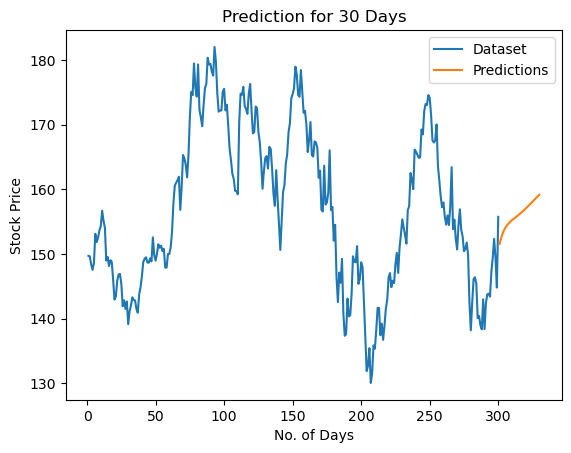

In [64]:
plt.plot(day_new,scaler.inverse_transform(df1[959:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('No. of Days')
plt.ylabel('Stock Price')
plt.title('Prediction for 30 Days')
plt.legend(['Dataset','Predictions'])
plt.show()

Text(0.5, 1.0, 'Prediction for 30 Days')

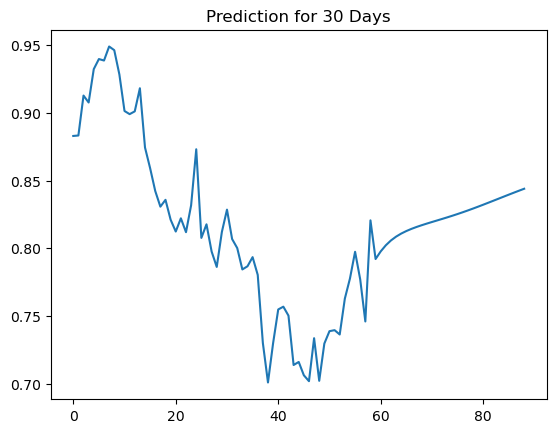

In [60]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.title('Prediction for 30 Days')


In [65]:
df3=scaler.inverse_transform(df3).tolist()

Text(0, 0.5, 'Stock Price')

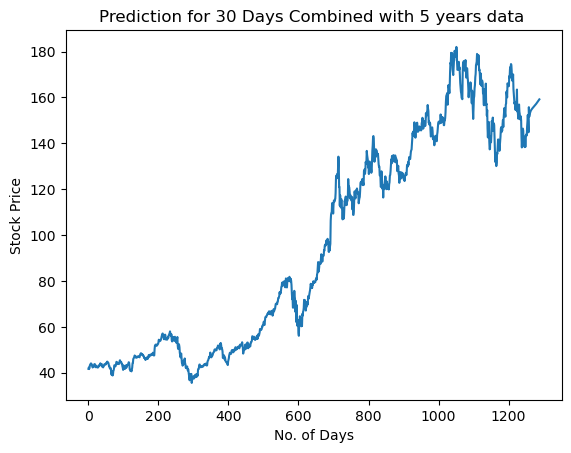

In [68]:
plt.plot(df3)
plt.title('Prediction for 30 Days Combined with 5 years data ')
plt.xlabel('No. of Days')
plt.ylabel('Stock Price')

